<a href="https://colab.research.google.com/github/sbsaptarshi/Exploration_of_World_Happiness_Report/blob/master/Worldwide_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Worldwide Happiness: A look into World Happiness Report Dataset

The World Happiness Report is a landmark survey of the state of global happiness that ranks approximately 150 countries by how happy their citizens perceive themselves to be. To know more about the report, the research behind it and procedures, please visit [The World Happiness Report](https://worldhappiness.report/ed/2020/#read). 

The dataset can be accessed through this kaggle link: [World Happiness Report-Dataset](https://www.kaggle.com/mathurinache/world-happiness-report?select=2015.csv)

The goal of this project is to have a better understanding of the dataset and to explore the applications of machine learning on the data to predict the Well-being (Cantril Score) through other development and/or subjective parameters. 

In [435]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
sns.set_style('darkgrid')
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
import plotly.io as pio
pio.renderers.default = 'colab'

**Machine Learning Libraries**

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

## Data Import 

The dataset consists of data from the following years:

- 2015
- 2016
- 2017
- 2018
- 2019

We can first first look at them individually and then combine them if and when needed.

**2015**

In [337]:
url1='https://raw.githubusercontent.com/sbsaptarshi/World_Happiness_Index/master/2015.csv'
whi_15=pd.read_csv(url1)
whi_15.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


**2016**

In [338]:
url2='https://raw.githubusercontent.com/sbsaptarshi/World_Happiness_Index/master/2016.csv'
whi_16=pd.read_csv(url2)
whi_16.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


**2017**

In [339]:
url3='https://raw.githubusercontent.com/sbsaptarshi/World_Happiness_Index/master/2017.csv'
whi_17=pd.read_csv(url3)
whi_17.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


**2018**

In [340]:
url4='https://raw.githubusercontent.com/sbsaptarshi/World_Happiness_Index/master/2018.csv'
whi_18=pd.read_csv(url4)
whi_18.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


**2019**

In [341]:
url5='https://raw.githubusercontent.com/sbsaptarshi/World_Happiness_Index/master/2019.csv'
whi_19=pd.read_csv(url5)
whi_19.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


Each year's dataframe has slightly varied columns with some having different metrics. First thing to do would be to make it uniform.

The following columns are to be maintained in each year's dataset and renamed to a consistent column name:
- Overall Rank (Rank)
- Country (Country)
- Region (Region)
- Happiness Score (Score)
- GDP per capita (GDP)
- Social Support/Family (Support)
- Freedom to make life choices (Freedom)
- Healthy life expectancy (HLE)
- Trust/Corruption (Trust_in_gov)

The meaning for each of the above columns are described further on. The following columns are omitted :

- Dystopia/Dystopia Residue
- Upper/Lower whiskers
- Upper/Lower Confidence Intervals

These columns aren't present in all the years and it wouldn't be appropriate to impute or interpolate such large amounts of data, hence they are removed. Dystopia is an imaginary country that supposedly has the least-happy people and is just there for benchmark and a positive comparison metric. Since, it is not a determining metric, it is possible to remove it for further consideration in this project alone. More can be found here: [World Happiness Index-FAQ](https://worldhappiness.report/faq/)

## Reshaping the Dataframes

In [342]:
# Getting the regions for joining to other dataframes
regions = whi_15[['Country','Region']]

**Year 2015**

In [343]:
df15 = whi_15.drop('Standard Error',axis =1)
df15.drop('Dystopia Residual',axis =1, inplace = True)

In [344]:
df15=df15[['Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Family',
           'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]
df15.rename(columns={'Happiness Rank':'Rank','Happiness Score':'Score',
                    'Economy (GDP per Capita)':'GDP','Family':'Support','Health (Life Expectancy)':'HLE',
                    'Trust (Government Corruption)':'Trust_in_Gov'},
            inplace=True)

**Year 2016**

In [345]:
df16 = whi_16.drop('Dystopia Residual',axis=1)
df16.drop('Lower Confidence Interval',axis=1,inplace=True)
df16.drop('Upper Confidence Interval',axis=1,inplace=True)

In [346]:
df16=df16[['Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Family',
           'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]
df16.rename(columns={'Happiness Rank':'Rank','Happiness Score':'Score',
                    'Economy (GDP per Capita)':'GDP','Family':'Support','Health (Life Expectancy)':'HLE',
                    'Trust (Government Corruption)':'Trust_in_Gov'},
            inplace=True)

**Year 2017**

In [347]:
df17 = whi_17.drop('Dystopia.Residual',axis=1)
df17.drop('Whisker.high',axis=1,inplace=True)
df17.drop('Whisker.low',axis=1,inplace=True)

In [348]:
df17 = pd.merge(df17,regions,on=['Country'])

In [349]:
df17 = df17[['Country','Region','Happiness.Rank','Happiness.Score','Economy..GDP.per.Capita.','Family',
            'Health..Life.Expectancy.','Freedom','Trust..Government.Corruption.','Generosity']]
df17.rename(columns={'Happiness.Rank':'Rank','Happiness.Score':'Score',
                    'Economy..GDP.per.Capita.':'GDP','Family':'Support','Health..Life.Expectancy.':'HLE',
                    'Trust..Government.Corruption.':'Trust_in_Gov'},
            inplace=True)

**Year 2018**

In [350]:
whi_18.rename(columns={'Country or region':'Country'},inplace=True)
df18 = pd.merge(whi_18,regions,on=['Country'])

In [351]:
df18 = df18[['Country','Region','Overall rank','Score','GDP per capita','Social support',
            'Healthy life expectancy','Freedom to make life choices','Perceptions of corruption','Generosity']]
df18.rename(columns={'Overall rank':'Rank','GDP per capita':'GDP','Social support':'Support',
                     'Healthy life expectancy':'HLE','Freedom to make life choices':'Freedom',
                     'Perceptions of corruption':'Trust_in_Gov'},inplace=True)

**Year 2019**

In [352]:
whi_19.rename(columns={'Country or region':'Country'},inplace=True)
df19 = pd.merge(whi_19,regions,on=['Country'])

In [353]:
df19 = df19[['Country','Region','Overall rank','Score','GDP per capita','Social support',
            'Healthy life expectancy','Freedom to make life choices','Perceptions of corruption','Generosity']]
df19.rename(columns={'Overall rank':'Rank','GDP per capita':'GDP','Social support':'Support',
                     'Healthy life expectancy':'HLE','Freedom to make life choices':'Freedom',
                     'Perceptions of corruption':'Trust_in_Gov'},inplace=True)

## Understanding the Data

In [354]:
df15.head()

,Country,Region,Rank,Score,GDP,Support,HLE,Freedom,Trust_in_Gov,Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


Only the 2015 dataframe is shown above as an example. The remaining years' dataframes are identical in columns and meaning.

**Region** - Countries are clustered into geographical regions. 

In [355]:
df15['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

**Rank** - Position of country based on Cantril (Well-Being) Score 'Score' out of all surveyed countries. 

**Score** - It is the sample mean of the answer to the question - *“Please imagine a ladder, with steps numbered from 0 at the
bottom to 10 at the top. The top of the ladder represents the best possible life
for you and the bottom of the ladder represents the worst possible life for you.
On which step of the ladder would you say you personally feel you stand at this
time?”* Also called as the [Cantril Ladder](https://news.gallup.com/poll/122453/understanding-gallup-uses-cantril-scale.aspx). This column will be referred as 'Cantril Score' in text. 

**GDP** - Per capita in PPP which is then normalized obtained from World Development Indicator (WDI). The data collection process can be found in [Statistical Index](https://happiness-report.s3.amazonaws.com/2020/WHR20_Ch2_Statistical_Appendix.pdf) of World Happiness Report (2020)

**Support** - It is the national average of binary response to “If you
were in trouble, do you have relatives or friends you can count on to help you
whenever you need them, or not?"

**HLE** - Healthy Life Expectancy taken at birth based on data extracted from WHO Global Health observatory repository. More about the process [here](https://happiness-report.s3.amazonaws.com/2020/WHR20_Ch2_Statistical_Appendix.pdf)

**Trust in Government** - National average of binary response to two questions, “Is corruption widespread throughout
the government or not” and “Is corruption widespread within businesses or
not?” Discrepencies in the collection process are discussed [here](https://happiness-report.s3.amazonaws.com/2020/WHR20_Ch2_Statistical_Appendix.pdf)

**Generosity** - The residual of regressing national average of response to the GWP
question “Have you donated money to a charity in the past month?” on GDP
per capita.

### Data Info and Description

To get some better understanding of the data, info and describe methods are applied. NULL values are to be taken care of.

**Info**

In [356]:
print(df15.info())
print(df16.info())
print(df17.info())
print(df18.info())
print(df19.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       158 non-null    object 
 1   Region        158 non-null    object 
 2   Rank          158 non-null    int64  
 3   Score         158 non-null    float64
 4   GDP           158 non-null    float64
 5   Support       158 non-null    float64
 6   HLE           158 non-null    float64
 7   Freedom       158 non-null    float64
 8   Trust_in_Gov  158 non-null    float64
 9   Generosity    158 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       157 non-null    object 
 1   Region        157 non-null    object 
 2   Rank          157 non-null   

There is only one null values described as `NaN` in any of the dataframes. It is in the year 2018 in the column `Trust_in_Gov`.  The highest number of datapoints is in the year 2015, but there isn't a drastic difference in any of the years. 

In [357]:
frames = [df15.describe(),df16.describe(),df17.describe(),df18.describe(),df19.describe()]
desc = pd.concat(frames)
desc

,Rank,Score,GDP,Support,HLE,Freedom,Trust_in_Gov,Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635


There does seem to be quite a few 0.0 values from GDP Column to Generosity column. As there isn't readily available explanation as to how averages (Generosity, Trust_in_Gov, Fredom, Support) can be 0. They can be classified as NULL values. Secondly, continuous columns like GDP and HLE also lack explanation for 0.0 as a value. Hence, they can be treated as Null values as well. 

In [358]:
#Replacing 0s with Null values 
df15.replace(0,np.nan,inplace=True)
df16.replace(0,np.nan,inplace=True)
df17.replace(0,np.nan,inplace=True)
df18.replace(0,np.nan,inplace=True)
df19.replace(0,np.nan,inplace=True)

### Visualizing the extent of Missing Data

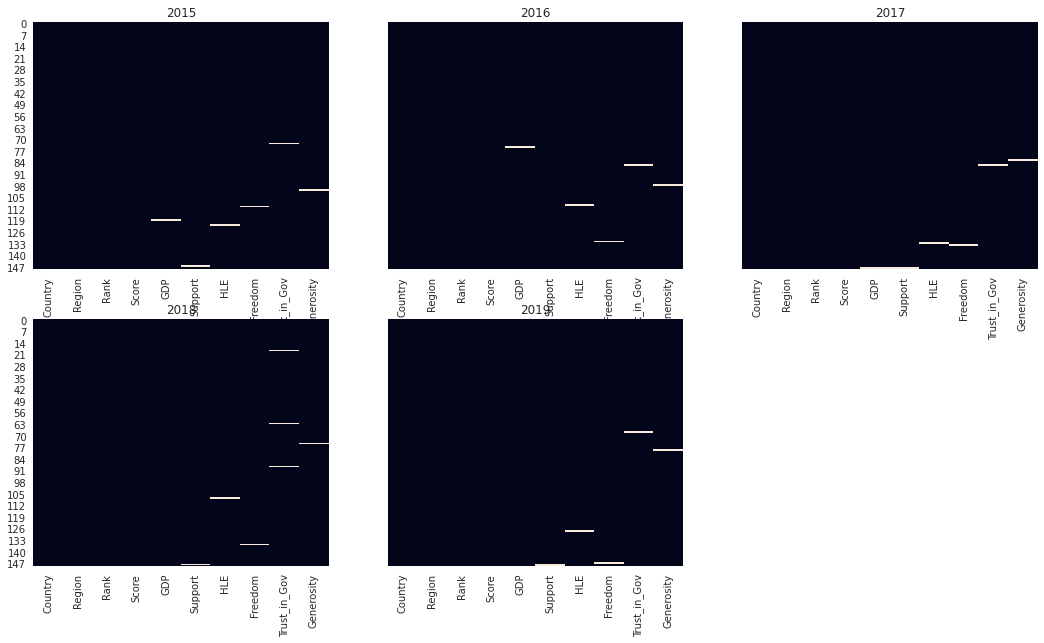

In [359]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(18,10),sharex=False,sharey=True)
sns.heatmap(df15.isnull(),cbar=False,ax=axes[0][0]).set(title='2015')
sns.heatmap(df16.isnull(),cbar=False,ax=axes[0][1]).set(title='2016')
sns.heatmap(df17.isnull(),cbar=False,ax=axes[0][2]).set(title='2017')
sns.heatmap(df18.isnull(),cbar=False,ax=axes[1][0]).set(title='2018')
sns.heatmap(df19.isnull(),cbar=False,ax=axes[1][1]).set(title='2019')
fig.delaxes(axes[1][2])

NULL values are represented as white dashes in the heatmap. Since, NULL values do not take up a considerable portion of our data and since these datapoints are independent of other rows/values, it is best that these datapoints are removed rather than imputed. 

**Dropping Rows with NULL values**

In [360]:
df15 = df15.dropna(axis=0)
df16 = df16.dropna(axis=0)
df17 = df17.dropna(axis=0)
df18 = df18.dropna(axis=0)
df19 = df19.dropna(axis=0)

## Exploratory Data Analysis

### Cantril Score Map 

The following maps the Cantril Score as well as the Rank in 2019 as that is the latest year and can give a good indication of 'happiness/well-being' and to visualize how nations fair. 

*Assumption* - The Happiness Score of 2019 is indicative of the general scores of previous years in dataset. 

In [361]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [436]:
data=dict(type='choropleth',
         locations=df19['Country'],
         locationmode = 'country names',
         z=df19['Score'],
         text=df19['Rank'],
         colorbar = {'title': 'Cantril Ladder Score Scale'},
         colorscale = 'YlGn'
         )

layout = dict(title = '2019 WHI - Cantril Score',
              geo = dict(showframe=False,
                       projection = {'type':'equirectangular'}))

fig = go.Figure(data=[data], layout = layout)
iplot(fig)

**Visual Inferences**

- The map suggests countries with high perceived GDP's (Western Europe, North America, Autralia) have a higher Cantril score.
- Countries that are not featured in the survey are alloted a grayish color. 



### Regional Analysis of Cantril Scores

A closer look into the differences of the Cantril Scores based on Geographical region. 

In [363]:
score15=pd.DataFrame(df15.groupby(by='Region')['Score'].mean())
score16=pd.DataFrame(df16.groupby(by='Region')['Score'].mean())
score17=pd.DataFrame(df17.groupby(by='Region')['Score'].mean())
score18=pd.DataFrame(df18.groupby(by='Region')['Score'].mean())
score19=pd.DataFrame(df19.groupby(by='Region')['Score'].mean())

In [364]:
scores = [score15,score16,score17,score18,score19]

In [365]:
dfscores = pd.concat(scores,axis=1)
dfscores.columns=['2015','2016','2017','2018','2019']
dfscores['Mean Score'] = (dfscores['2015']+dfscores['2016']+dfscores['2017']+dfscores['2018']+dfscores['2019'])/5
dfscores.reset_index(level=0,inplace=True)

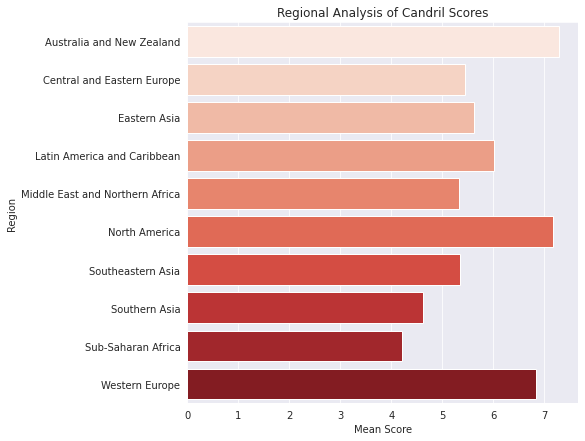

In [366]:
plt.figure(figsize=(7,7))
sns.barplot(y='Region',x='Mean Score',data=dfscores,orient='h',palette='Reds').set(title='Regional Analysis of Candril Scores');

The detailed dataframe for the above graph is shown. 

In [367]:
print('\n'+'\033[1m' + '\t\t\t\t'+ 'Mean Cantril Scores grouped by Region'+'\033[0m')
dfscores


				Mean Cantril Scores grouped by Region


,Region,2015,2016,2017,2018,2019,Mean Score
0,Australia and New Zealand,7.285000,7.323500,7.299000,7.298000,7.267500,7.294600
1,Central and Eastern Europe,5.332931,5.378107,5.418071,5.469852,5.573370,5.434466
2,Eastern Asia,5.626167,5.624167,5.496500,5.672000,5.688833,5.621533
3,Latin America and Caribbean,6.144682,6.101750,5.957905,5.937750,5.942550,6.016927
4,Middle East and Northern Africa,5.445316,5.386053,5.369684,5.199889,5.237000,5.327588
5,North America,7.273000,7.254000,7.154500,7.107000,7.085000,7.174700
6,Southeastern Asia,5.307250,5.338889,5.444875,5.313444,5.273667,5.335625
7,Southern Asia,4.580857,4.563286,4.628429,4.603857,4.747500,4.624786
8,Sub-Saharan Africa,4.200270,4.107853,4.144061,4.226667,4.353853,4.206541
9,Western Europe,6.781250,6.768300,6.777550,6.906526,6.983211,6.843367


### Cantril Score vs GDP 

To understand whether GDP has any bearing on the Cantril Score-  in supplement to the visual inferences from the map. Datasets from all the five years are checked.  

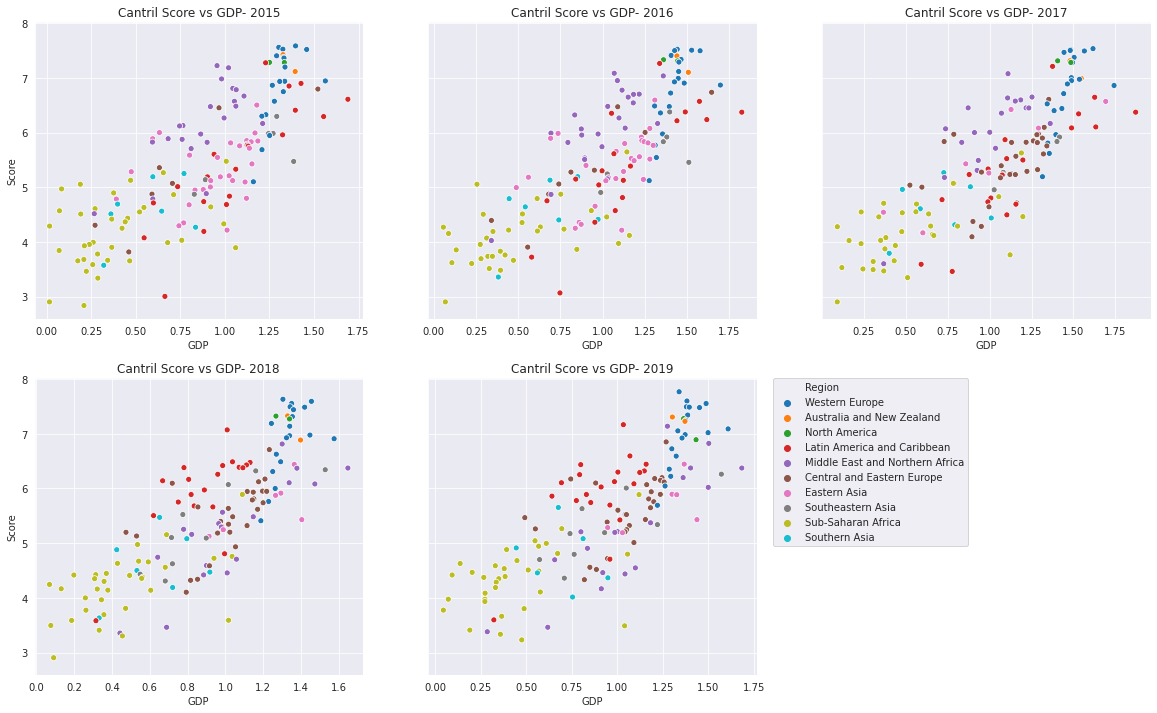


Correlation Coefficients: 
2015: r = 0.786120950902935
2016: r = 0.8037615286213535
2017: r = 0.8235521031816797
2018: r = 0.8167834824879342
2019: r = 0.7909643890763439


In [368]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(20,12),sharex=False,sharey=True)
fig.delaxes(axes[1][2])
sns.scatterplot(x='GDP',y='Score',hue='Region',data=df15,ax=axes[0][0],legend=False).set(title='Cantril Score vs GDP- 2015')
sns.scatterplot(x='GDP',y='Score',hue='Region',data=df16,ax=axes[0][1],legend=False).set(title='Cantril Score vs GDP- 2016')
sns.scatterplot(x='GDP',y='Score',hue='Region',data=df17,ax=axes[0][2],legend=False).set(title='Cantril Score vs GDP- 2017')
sns.scatterplot(x='GDP',y='Score',hue='Region',data=df18,ax=axes[1][0],legend=False).set(title='Cantril Score vs GDP- 2018')
sns.scatterplot(x='GDP',y='Score',hue='Region',data=df19,ax=axes[1][1],legend='full').set(title='Cantril Score vs GDP- 2019')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print('\n'+'\033[1m' + 'Correlation Coefficients: '+'\033[0m')
print('2015: r = '+ str(df15['Score'].corr(df15['GDP'])) )
print('2016: r = '+ str(df16['Score'].corr(df16['GDP'])) )
print('2017: r = '+ str(df17['Score'].corr(df17['GDP'])) )
print('2018: r = '+ str(df18['Score'].corr(df18['GDP'])) )
print('2019: r = '+ str(df19['Score'].corr(df19['GDP'])) )

**Visual Inferences**

An expected high correlation is observed between Cantril Score and GDP per Capita in PPP. It is noted that Western European, Australia and NZ, North American countries are on the top right hand corner in each year (High Cantril Score, High GDP pc PPP) and Sub-Saharan African countries are clustered towards the bottom left (Low Cantril Score, Low GDP pc PPP). 

### Feature Relations 

So far, only GDP and Geographical region is looked into as potential determining metrics. The other columns are to be looked at. An appropriate approach would be to see how the different feature columns correlate with each other. 

#### Feature Correlation Map

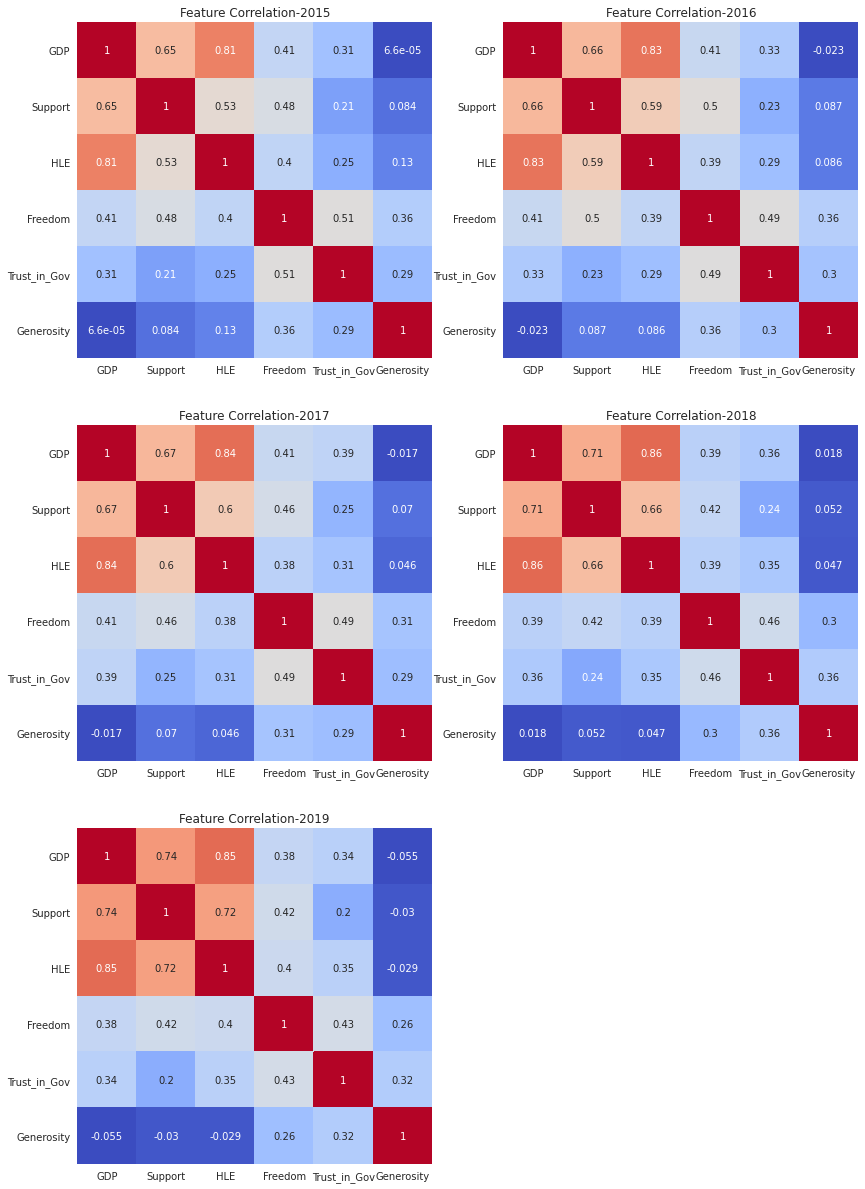

In [369]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(14,21))
sns.heatmap(df15[['GDP','Support','HLE','Freedom','Trust_in_Gov','Generosity']].corr(),
            annot=True,cmap='coolwarm',cbar=False,ax=ax[0][0]).set(
    title='Feature Correlation-2015'
)
sns.heatmap(df16[['GDP','Support','HLE','Freedom','Trust_in_Gov','Generosity']].corr(),
            annot=True,cmap='coolwarm',cbar=False,ax=ax[0][1]).set(
    title='Feature Correlation-2016'
)
sns.heatmap(df17[['GDP','Support','HLE','Freedom','Trust_in_Gov','Generosity']].corr(),
            annot=True,cmap='coolwarm',cbar=False,ax=ax[1][0]).set(
    title='Feature Correlation-2017'
)
sns.heatmap(df18[['GDP','Support','HLE','Freedom','Trust_in_Gov','Generosity']].corr(),
            annot=True,cmap='coolwarm',cbar=False,ax=ax[1][1]).set(
    title='Feature Correlation-2018'
)
sns.heatmap(df19[['GDP','Support','HLE','Freedom','Trust_in_Gov','Generosity']].corr(),
            annot=True,cmap='coolwarm',cbar=False,ax=ax[2][0]).set(
    title='Feature Correlation-2019'
)
fig.delaxes(ax[2][1])
plt.show()

**Visual Inferences** 

- Very Strong correlation between 'HLE' and 'GDP' 
- Strong correlation between 'Support' and 'GDP'

These two columns seem to possess high correlation with 'GDP'. Since, GDP is highly correlated with the Score, the hypothesis is that these two columns could possible be correlated with the Score as well. 

Furthermore, due to near identical correlation across all years, using only 2019 dataframe for further exploratory analysis with 'HLE' and 'Support' will be indicative of the remaining dataframes. 

#### Support and HLE as indicators for Cantril Score

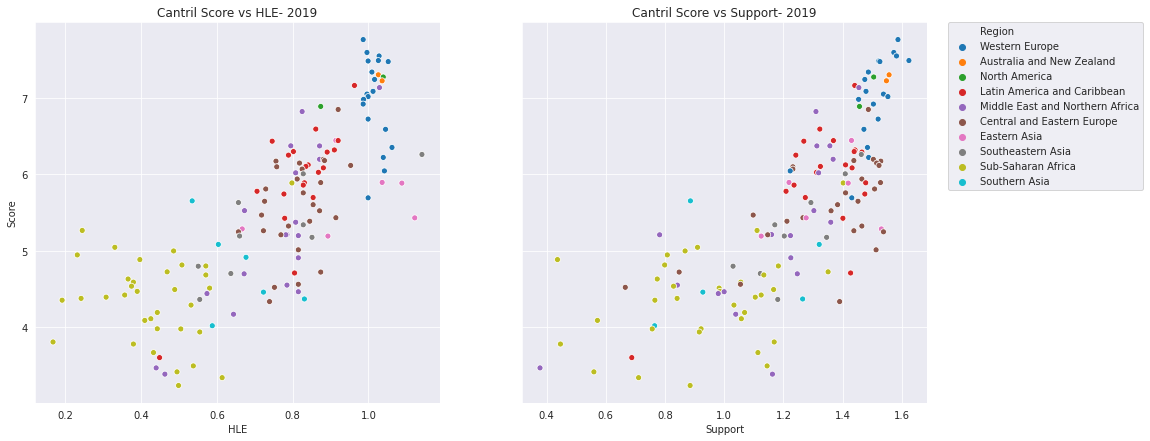


Correlation Coefficients: 
HLE: r = 0.7773988538423536
Support: r = 0.7638188346446834


In [370]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,7),sharex=False,sharey=True,squeeze=False)
sns.scatterplot(x='HLE',y='Score',hue='Region',data=df19,ax=axes[0][0],legend=False).set(title='Cantril Score vs HLE- 2019')
sns.scatterplot(x='Support',y='Score',hue='Region',data=df19,ax=axes[0][1],legend='brief').set(title='Cantril Score vs Support- 2019')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0);
plt.show()
print('\n'+'\033[1m' + 'Correlation Coefficients: '+'\033[0m')
print('HLE: r = '+ str(df19['Score'].corr(df19['HLE'])) )
print('Support: r = '+ str(df19['Score'].corr(df19['Support'])) )

**Visual Inferences** 

- Strong correlation shown from 'HLE' and 'Support'. 
- When the data is fed into training a machine learning algorithm, these two parameters,along with GDP and region, will be the most important while predicting the Cantril Score. 

### Cantril Score through The Years 

It is important to check the distribution of the scores themselves. It will help understand its suitability for Machine Learning algorithms. The scores should also be checked to see if there are any biases present. This means that a normal distribution would be most appropriate when training a machine learning model. 

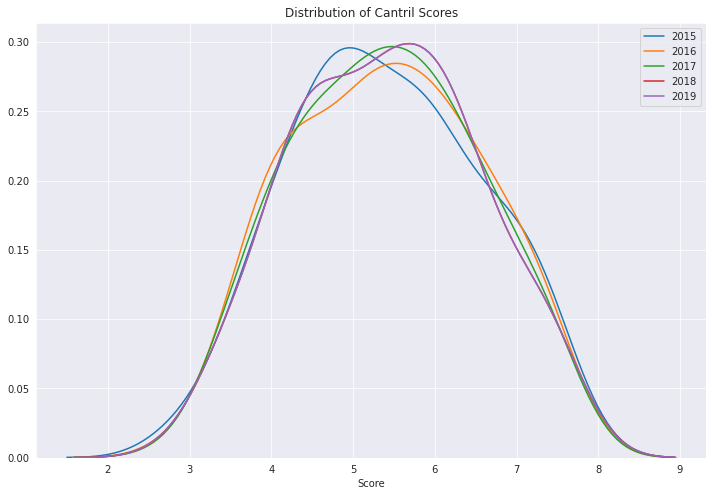

In [371]:
plt.figure(figsize=(12,8))
sns.distplot(df15['Score'],hist=False,label='2015')
sns.distplot(df16['Score'],hist=False,label='2016')
sns.distplot(df17['Score'],hist=False,label='2017')
sns.distplot(df18['Score'],hist=False,label='2018')
sns.distplot(df18['Score'],hist=False,label='2019')
plt.title('Distribution of Cantril Scores')
plt.legend();

**Inferences** 

The Cantril scores are fairly normally distributed in all the years and the spread is near identical barring a few discrepencies. This distribution is perfectly suitable for being a label in a supervised learning model due to no presence of bias or skewness. 

## Data Preconditioning

To ensure a large enough training and testing sample, all the datasets are combined and then categorical data ('Region') is turned into dummy columns for them to be suitable. 

In [372]:
list_of_dfs = [df15,df16,df17,df18,df19]
df = pd.concat(list_of_dfs,ignore_index=True)

The Rank column is then dropped as that is just a metric for comparison between countries and not a metric for determining the Cantril score.  

In [373]:
df.drop('Rank',axis=1,inplace=True)

'Region' is a categorical column, so it is converted into dummy columns and one of the columns is removed to avoid multiple colinearity. 

In [374]:
reg = pd.get_dummies(df['Region'],drop_first=True)

In [375]:
df.drop('Region',axis=1,inplace=True)

In [376]:
df = pd.concat([df,reg],axis=1)

In [377]:
df.head()

,Country,Score,GDP,Support,HLE,Freedom,Trust_in_Gov,Generosity,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0,0,0,0,0,0,0,0,1
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0,0,0,0,0,0,0,0,1
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0,0,0,0,0,0,0,0,1
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0,0,0,0,0,0,0,0,1
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0,0,0,0,1,0,0,0,0


The data can now be used to train a machine learning model. 

## Model Selection - Linear Regression

**Problem Statement and  Aim**: The 'Cantril Score' or the 'Cantril Ladder Value' is a mean of the answer to the question mentioned previously. However, can this value be predicted using other included metrics and questions from the World Happiness Report. 

**Model** : A Linear Regression model is an easy algorithm useful for predicting continuous data. 

### Model Training

#### Data Splitting

**Data Split (a)** - Split the data into parameters and labels (X and y)

In [378]:
X = df.drop(['Country','Score'],axis=1)
y = df['Score']

**Data Split (b)** - Split the X and y dataframes into training and testing sets. 

In [379]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#### Model Fitting

In [380]:
#Creating an object of Linear Regression 
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Feature Importance

In [381]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df.reset_index(level=0,inplace=True)
coeff_df.sort_values(by='Coefficient',inplace=True,ascending=False)

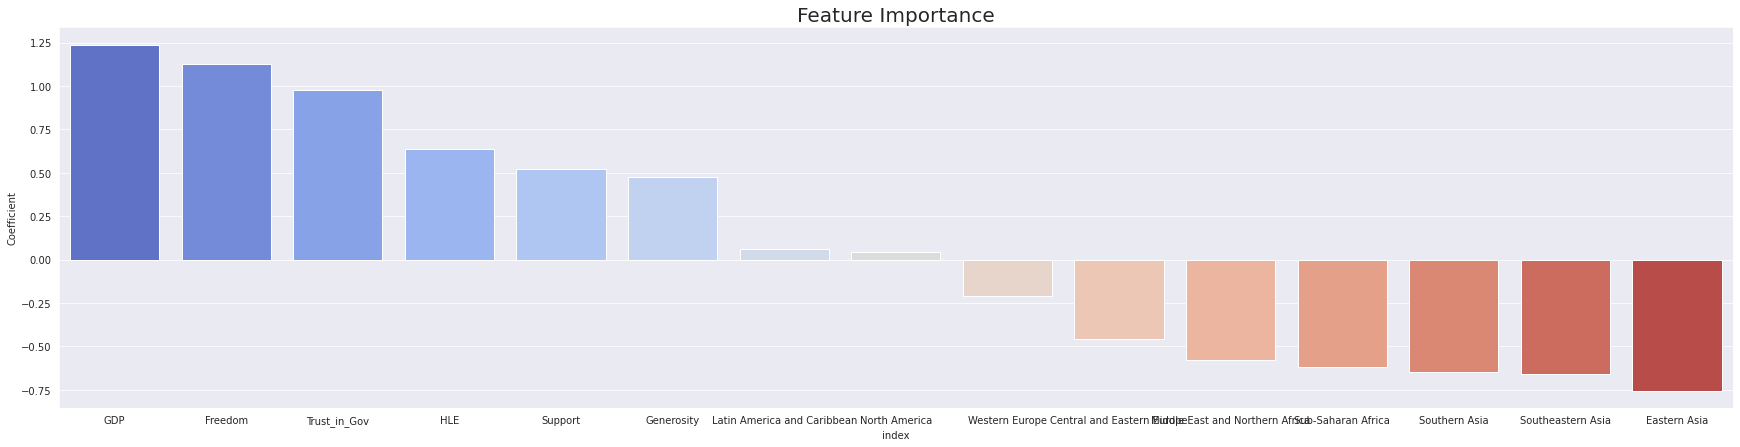

In [382]:
plt.figure(figsize=(30,7))
sns.barplot(x='index',y='Coefficient',data=coeff_df,palette='coolwarm')
plt.title('Feature Importance',fontsize=20);

### Model Prediction

In [383]:
pred = lm.predict(X_test)

### Model Evaluation

Using `matplotlib` and `seaborn` visualization tools, the performance of the model is checked in two ways: 

- Plotting the predictions against true values;
- Plotting a histogram of the residual of the predictions when compared with true values. 

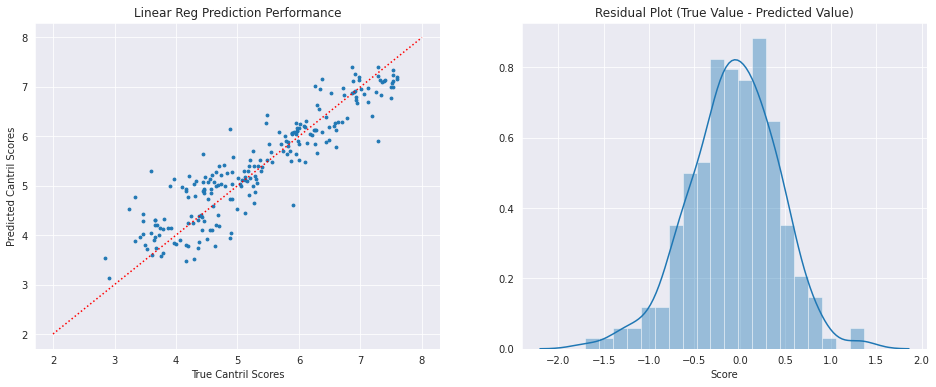

In [384]:
figure,(ax1,ax2) =plt.subplots(nrows=1,ncols=2,figsize=(16,6))
ax1.scatter(y_test,pred,s=8)
ax1.plot(np.linspace(2,8,50),np.linspace(2,8,50),ls=':',c='r')
ax1.set_title('Linear Reg Prediction Performance')
ax1.set_ylabel('Predicted Cantril Scores')
ax1.set_xlabel('True Cantril Scores');

sns.distplot((y_test-pred),bins=20,ax=ax2)
ax2.set_title('Residual Plot (True Value - Predicted Value)');

The Performance plot suggests a fairly decent perforamnce as all values are close to y=x line. This is backed up by the residual plot that peaks around 0 implying that a large percentage of points were predicted very accurately. A closer look at the numbers will be beneficial. 

In [385]:
print('\n'+'\033[1m' + 'Performance Metrics '+'\033[0m')
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Mean of Residual plot is (ideal=0): ',(y_test-pred).mean())


Performance Metrics 
MAE: 0.37873267503335917
MSE: 0.23634440711537016
RMSE: 0.48615265824159615
Mean of Residual plot is (ideal=0):  -0.07025823659992604


The model gives a fairly reliable performance, however, let's try and scale the data using scikitlearn's `Standard Scaler` library. This will try to adjust for any parameter having overinfluence in the above model. 



## Model Selection 2 - Linear Regression with Scaled Data 

Test to see if the performance of the previous model can be improved upon by scaling the data using `Standard Scaler`. Standard Scaler standardizes features by removing the mean and scaling to unit variance; essentially giving datapoints a z-score. 

### Model Training

In [386]:
scaler = StandardScaler()

In [387]:
scaler.fit(X)
scaled_feat = scaler.transform(X)

In [388]:
Xsc =pd.DataFrame(scaled_feat,columns =X.columns) 

In [389]:
Xsc.head(3)

,GDP,Support,HLE,Freedom,Trust_in_Gov,Generosity,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,1.176434,0.810029,1.336342,1.683981,2.73721,0.619479,-0.483336,-0.199148,-0.413103,-0.383243,-0.117525,-0.249457,-0.220389,-0.551117,2.547508
1,0.939158,0.974690,1.363325,1.433692,0.12870,1.752087,-0.483336,-0.199148,-0.413103,-0.383243,-0.117525,-0.249457,-0.220389,-0.551117,2.547508
2,0.997501,0.844604,1.055195,1.573868,3.33505,0.981618,-0.483336,-0.199148,-0.413103,-0.383243,-0.117525,-0.249457,-0.220389,-0.551117,2.547508


#### Data Splitting

In [390]:
ysc=y

In [391]:
Xsc_train,Xsc_test,ysc_train,ysc_test = train_test_split(Xsc,ysc,test_size=0.3)

#### Model Fitting

In [392]:
lmsc = LinearRegression()
lmsc.fit(Xsc_train,ysc_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Feature Importance

In [393]:
coeffsc_df = pd.DataFrame(lmsc.coef_,X.columns,columns=['Coefficient'])
coeffsc_df.reset_index(level=0,inplace=True)
coeffsc_df.sort_values(by='Coefficient',inplace=True,ascending=False)

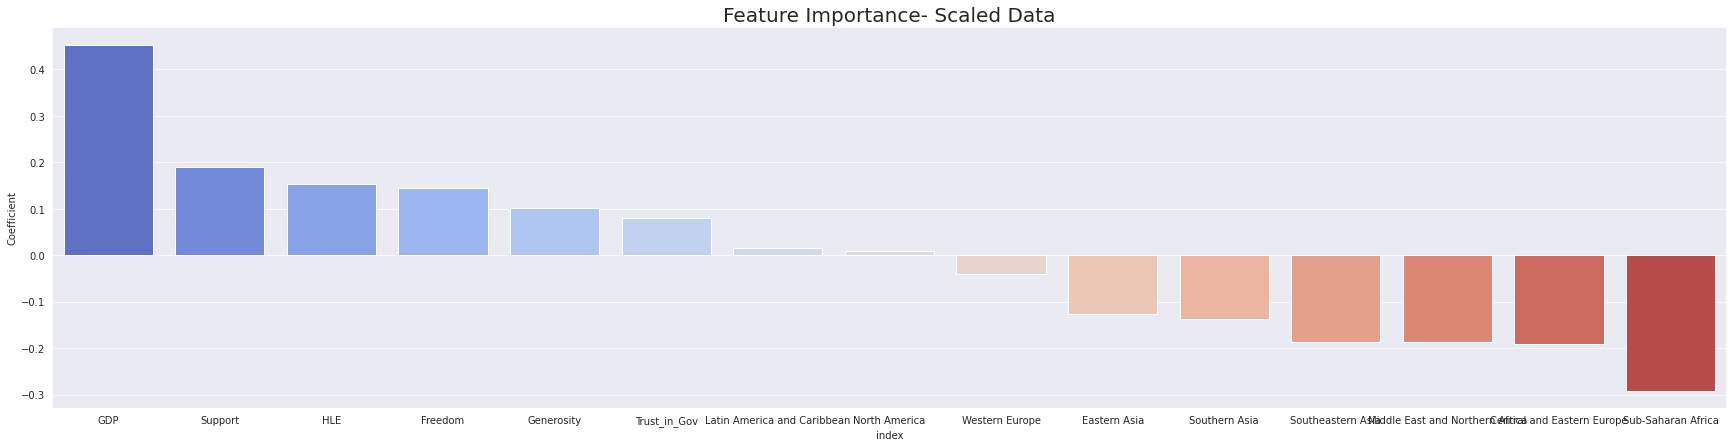

In [394]:
plt.figure(figsize=(30,7))
sns.barplot(x='index',y='Coefficient',data=coeffsc_df,palette='coolwarm')
plt.title('Feature Importance- Scaled Data',fontsize=20);

### Model Prediction

In [395]:
pred_sc = lmsc.predict(Xsc_test)

### Model Evaluation

Similar to the evaluation in Model Selection, the performance of the model is checked in two ways: 

- Plotting the predictions against true values;
- Plotting a histogram of the residual of the predictions when compared with true values. 

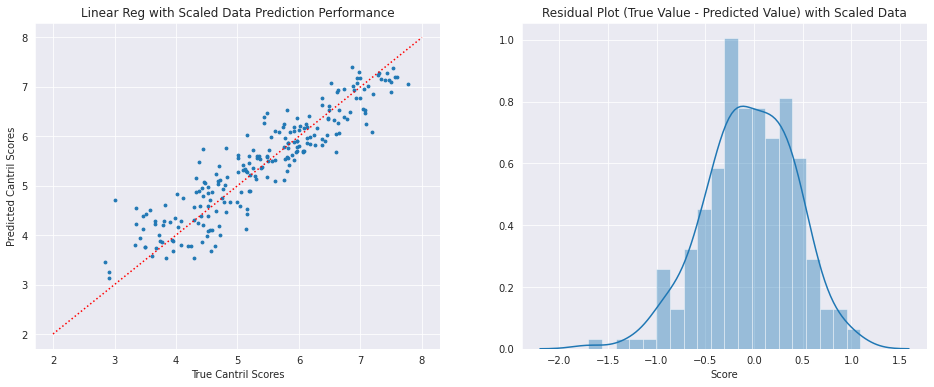

In [396]:
figure,(ax1,ax2) =plt.subplots(nrows=1,ncols=2,figsize=(16,6))
ax1.scatter(ysc_test,pred_sc,s=8)
ax1.plot(np.linspace(2,8,50),np.linspace(2,8,50),ls=':',c='r')
ax1.set_title('Linear Reg with Scaled Data Prediction Performance')
ax1.set_ylabel('Predicted Cantril Scores')
ax1.set_xlabel('True Cantril Scores');

sns.distplot((ysc_test-pred_sc),bins=20,ax=ax2)
ax2.set_title('Residual Plot (True Value - Predicted Value) with Scaled Data');

Visually, it's hard to tell if the scaled data has improved the performance. A closer look at the numbers shall give a more definitive idea. 

In [397]:
print('\n'+'\033[1m' + 'Performance Metrics '+'\033[0m')
print('MAE:', metrics.mean_absolute_error(ysc_test, pred_sc))
print('MSE:', metrics.mean_squared_error(ysc_test, pred_sc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ysc_test, pred_sc)))
print('Mean of Residual plot is (ideal=0): ',(ysc_test-pred_sc).mean())


Performance Metrics 
MAE: 0.3695904673221649
MSE: 0.21347381201372795
RMSE: 0.4620322629576077
Mean of Residual plot is (ideal=0):  -0.04697745832454114


Scaling the data has had little to no affect on the performance of the model. Infact, MAE, MSE, and RMSE have increased ever so slightly while on the other hand, the mean of the residual plot is closer to 0. The performance of the two models can be classified as being identical. 

## Can the Cantril Scores be predicted? 

Despite the 'Cantril Score' being a subjective response to 'Where do you see yourself, from 0-10, with 0 being the worst possible life and 10 being the best possible life?', it is highly affected by the following tangible parameters and other questions in the same GWP survey: 

- GDP per Capita (in PPP) or Income 
- Life expectancy 
- Perceived trust in Government and businesses
- Social Support 
- Geographical location (development of the neighboring countries) 

Given these parameters, the 'well-being/happiness' of an average citizen of the country can be estimated within reason. 



---



## Part 2: Grouping Countries

Gallup (organization responsible for collecting the data), divides the nations into three distinct and independent groups based on their 'Cantril Ladder score'. They are: 



1.   Thriving - Well-being that is strong, consistent and progressing. A Cantril score of 7+.
2.   Struggling - Well-being that is moderate or inconsistent.
3. Suffering - Well-being that is at high risk. Respondents have poor outlook on current life. A Cantril score below 4. 

For a more detailed explanation-visit this [Gallup Blog](https://news.gallup.com/poll/122453/understanding-gallup-uses-cantril-scale.aspx)



**Aim** : Clustering countries into Thriving, Struggling and Suffering with the help of the features in the dataset and not the score. This will allow more development indeces and survey questions to be the determining factor in the clustering rather than just the Cantril Score. 

### Data Preconditioning


Only the dataset from the year 2019 is used as a proof of concept. The following features are considered: GDP, Support, HLE, Freedom, Trust_in_Gov, Generosity. 

In [398]:
df_y19 = df19[['Country','GDP','Support','HLE','Freedom','Trust_in_Gov','Generosity']] 
df_y19.head()

,Country,GDP,Support,HLE,Freedom,Trust_in_Gov,Generosity
0,Finland,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,1.396,1.522,0.999,0.557,0.298,0.322


Scale the data using StandardScaler to normalize. 

In [399]:
#Create a Standard Scaler object
scaler_2 = StandardScaler()

In [400]:
scaler_2.fit(df_y19[['GDP','Support','HLE','Freedom','Trust_in_Gov','Generosity']])
sc_df19 = scaler_2.transform(df_y19[['GDP','Support','HLE','Freedom','Trust_in_Gov','Generosity']])


### Principal Component Analysis

The scaled data is multi-dimensional and is hard to visualize all the features together when clustering. Hence, the data is decomposed into a 2-dimensional data using Principal Component Analysis. 

In [401]:
#Create a principal component analysis object with 2 components 
pca = PCA(n_components = 2)

In [402]:
pca.fit(sc_df19)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [403]:
x_pca = pca.transform(sc_df19)
dfx_pca = pd.DataFrame(x_pca,columns=[['Principal Component 1','Principal Component 2']])
dfx_pca['Country']=df19['Country']

Let's also label the countries (Thriving, Struggling, Suffering) based on their Cantril Scores (in accordance with Gallup's methodology). 

In [404]:
def converter(scores): 
  if scores >=7: 
    return 1
  elif scores <=4: 
    return 3
  else: 
    return 2

In [405]:
dfx_pca['Group']=df19['Score'].apply(converter)

In [406]:
groups = df19['Score'].apply(converter)

In [407]:
dfx_pca.dropna(inplace=True)

In [408]:
dfx_pca.head()

,Principal Component 1,Principal Component 2,Country,Group
0,3.166397,0.897627,Finland,1.0
1,3.339936,1.683636,Denmark,1.0
2,3.383852,1.405115,Norway,1.0
3,2.599574,0.889330,Iceland,1.0
4,2.860379,1.579543,Netherlands,1.0


Now the six dimensional data has been decomposed into two components making it easier to visualize. PCA analysis ensures that the variance in data is not lost in decomposition.

### Visualization of Principal Components

The correlation between individual features and the principal component can be visualized using a `seaborn` heatmap. 

In [409]:
df_comp = pd.DataFrame(pca.components_,columns=['GDP','Support','HLE','Freedom','Trust_in_Gov','Generosity'])

0: Principal Component 1
1: Principal Component 2


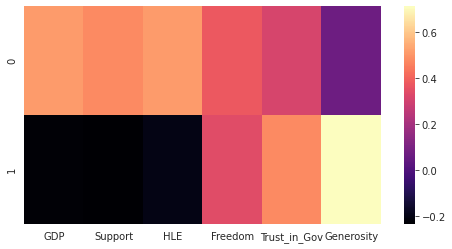

In [410]:
plt.figure(figsize=(8,4))
sns.heatmap(df_comp,cmap='magma')
print('0: Principal Component 1')
print('1: Principal Component 2');

### Clustering Model - K-Means Clustering

K-Means Clustering is used to group the countries with machine learning. The data used for grouping is the principal components deeming it easy to visualize.

In [412]:
#Create a KMeans Object
kmeans = KMeans(n_clusters=3)

In [416]:
kmeans.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [417]:
kmeans.cluster_centers_

array([[-1.9184043 ,  0.8904927 ],
       [ 0.27135052, -0.89335832],
       [ 2.56234002,  1.1128078 ]])

### Model Evaluation

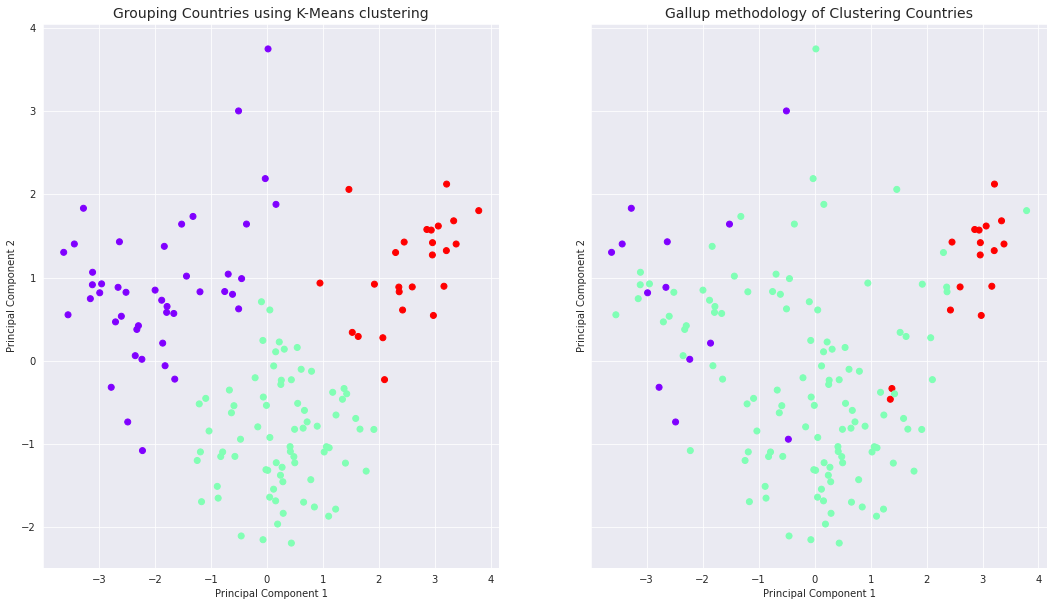


Plot Legend: 
Red : Thriving | Green : Struggling  | Purple : Suffering


In [427]:

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(18,10))
ax1.scatter(x_pca[:,0],x_pca[:,1],c=kmeans.labels_,cmap='rainbow')
ax1.set_title('Grouping Countries using K-Means clustering',fontsize = 14)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax2.scatter(x_pca[:,0],x_pca[:,1],c=groups,cmap='rainbow_r')
ax2.set_title('Gallup methodology of Clustering Countries',fontsize=14)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
plt.show(); 
print('\n'+'\033[1m' + 'Plot Legend: '+'\033[0m')
print('Red : Thriving | Green : Struggling  | Purple : Suffering')


**Recap** : Gallup groups the countries based on their 'Cantril ladder Scores' alone. The K-Means algorithm groups the countries using the other parameters featured in the world happiness reports. 

**Visual Inferences**: 

- The algorithm does a fairly good job of grouping the countries but it increases the number of suffering and thriving countries while reducing the number of struggling (middle of the pack) countries. 

- The clustering highlights the pitfalls of the features provided as predictors of happiness/wellbeing.  





---



---



## Future Work

- To try and apply K-Means algorithm on other years with available data. 
- Check what countries are wrongly grouped and see if there is any consistency in those points. 
- Evaluate the algorithm's validity compared to Gallup's methodology. This can be appropriately done only with proper expertise. 